In [35]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


uploading our dataset from a local directory

In [36]:
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/depression_dataset_reddit_cleaned.csv')
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [37]:
#shape of the dataset
df.shape

(7731, 2)

our dataset has 7731 rows and 3 columns

In [38]:
#misiing values
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

ur dataset is clean since it does not have null values

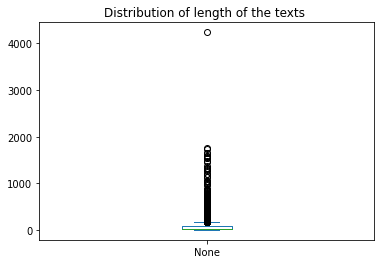

In [39]:
#  length and distribution of the texts
texts_len = pd.Series(len(text.split()) for text in df['clean_text'])
texts_len.plot(kind='box')
plt.title('Distribution of length of the texts ')
plt.show()

count    3900.000000
mean       14.294615
std         7.267336
min         1.000000
25%         8.000000
50%        13.000000
75%        20.000000
max        42.000000
Name: Length, dtype: float64

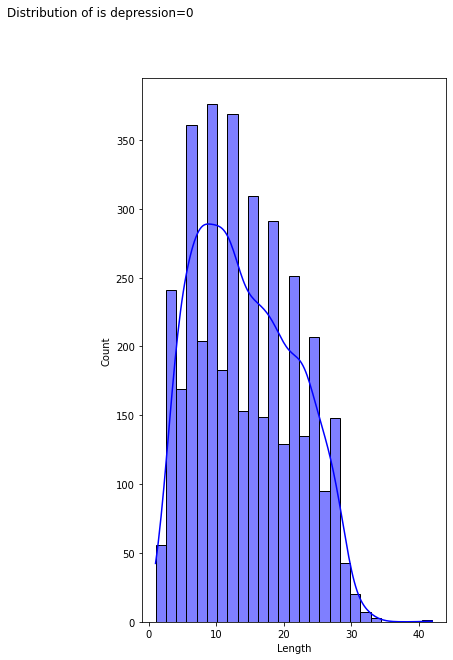

In [40]:
# statistics and distribution of is_depression
fig = plt.figure(figsize=(12, 10))
axw = fig.add_subplot(122)
df['Length'] = df.clean_text.str.split().apply(len)
sns.histplot(df[df['is_depression']==0]['Length'], ax=axw, color='blue',kde=True)
plt.suptitle('Distribution of is depression=0')
display(df.Length[df['is_depression']==0].describe())

the above figure shows that depression = 0 has a normalised data

count    3831.000000
mean      136.087184
std       185.829237
min         1.000000
25%        32.000000
50%        78.000000
75%       174.000000
max      4239.000000
Name: Length, dtype: float64

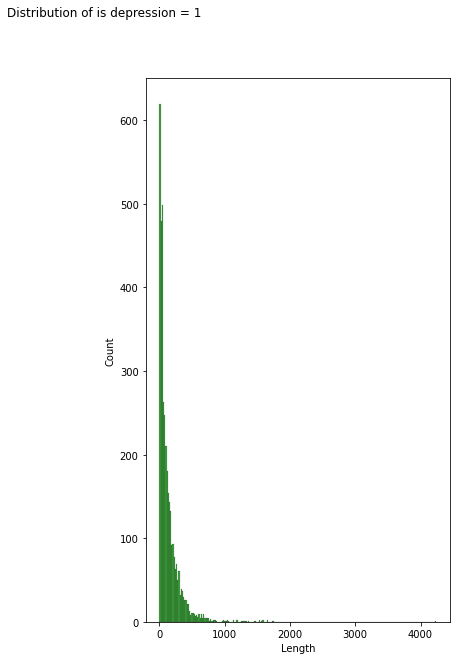

In [41]:
#statistics and distribution of is-depression
fig = plt.figure(figsize=(12, 10))
axxw = fig.add_subplot(122)
df['Length'] = df.clean_text.str.split().apply(len)
sns.histplot(df[df['is_depression']==1]['Length'], ax=axxw, color='green')
plt.suptitle('Distribution of is depression = 1')
display(df.Length[df['is_depression']==1].describe())

the above figure shows that our data (is depression = 1) is skewed to the left.To normalise data we will apply log function

count    3831.000000
mean      136.087184
std       185.829237
min         1.000000
25%        32.000000
50%        78.000000
75%       174.000000
max      4239.000000
Name: Length, dtype: float64

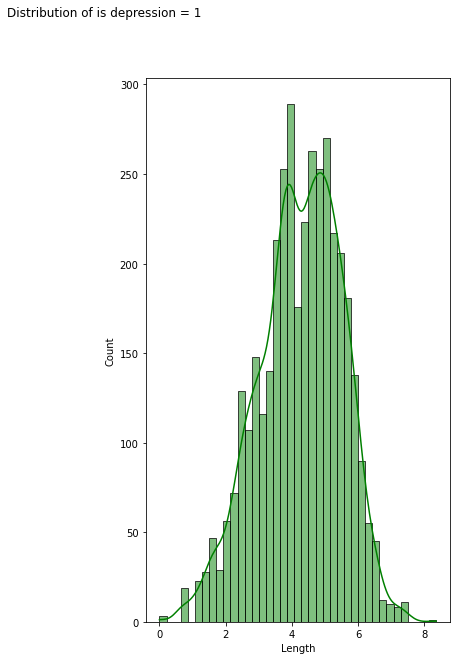

In [42]:
#statistics and distribution of is-depression
fig = plt.figure(figsize=(12, 10))
axxw = fig.add_subplot(122)
df['Length'] = df.clean_text.str.split().apply(len)
sns.histplot(np.log(df[df['is_depression']==1]['Length']), ax=axxw, color='green',kde=True)
plt.suptitle('Distribution of is depression = 1')
display(df.Length[df['is_depression']==1].describe())

well now  our data is quite normally distributed.

WordCloud
This is a visual representations of words in a text.the larger thw word the more frequent it is in the text

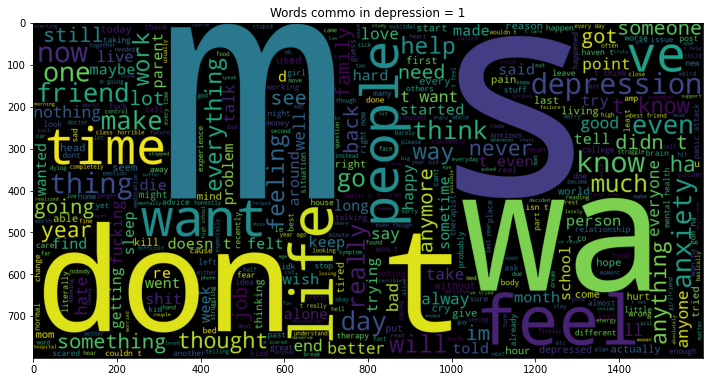

In [43]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 12))
wm1 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600,background_color='black').generate(
" ".join(df[df['is_depression']==1].clean_text))
plt.title(f'Words commo in depression = 1')
plt.imshow(wm1)

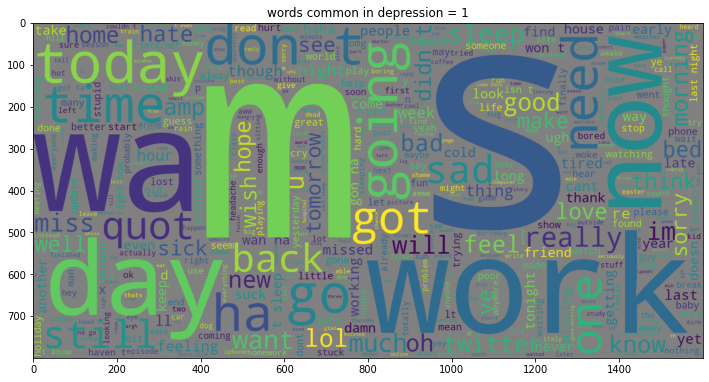

In [44]:
plt.figure(figsize=(12, 12))
wm2 = WordCloud(max_words=2000, min_font_size=10, height=800,width=1600, background_color='grey').generate(
    " ".join(df[df['is_depression']==0].clean_text)
)
plt.title('words common in depression = 1')
plt.imshow(wm2)

In [45]:
# importing libraries that will be used to clean our data
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# a function used to clean data
def preprocessing(data):
    #creating an empty list called corpus
    corpus = []
    for i in range(len(data)):
        # removing urls
        tweet1 = re.sub(r'http\S+',' ', df['clean_text'][i])
        # removing html tags
        tweet2 = re.sub(r'<.*?@>',' ', tweet1)
        # removing digits
        tweet3 = re.sub(r'\d+',' ', tweet2)
        # removing hashtags
        tweet4 = re.sub(r'#\w+',' ',tweet3)
        # removing punctuation marks
        review = re.sub(r'[^a-zA-Z]', ' ', tweet4)
        # changing words from proper case to lower case
        review = review.lower()
        # inteoducing spaces in the texts
        review = review.split()
        # removing stopwords which are words like prepositions and adverbs in our text
        review = [word for word in review if word not in set(stopwords.words('english'))]
        # modifying words in our text into their basic format
        review = [ps.stem(word) for word in review]
        # joining spaces in our text
        review = " ".join(review)
        # adding our cleaned text into empty list
        corpus.append(review)
    return corpus

In [46]:
# applying our function so as to clean our dataset
corpusr = preprocessing(df)

In [47]:
# a sample of the cleaned data
corpusr[:5]

['understand peopl repli immedi op invit talk privat mean help type respons usual lead either disappoint disast usual work quit differ say pm anytim casual social context huge admir appreci goodwil good citizenship mani support other flag inappropri content even know mani struggl hard work behind scene inform resourc make easier give get qualiti help small start new wiki page explain detail much better respond public comment least gotten know someon maintain r depress wiki privat contact full text current version summari anyon act helper invit accept privat contact e pm chat kind offsit commun earli convers show either bad intent bad judgement either way unwis trust pm anytim seem like kind gener offer might perfectli well mean unless solid rapport ha establish wise idea point consid offer accept invit commun privat post support repli publicli help peopl op respons good qualiti educ inspir helper rule http en wikipedia org wiki rule internet cultur appli much doe anywher els internet p

In [48]:
# spliting our dataset into x and y variables
x = corpusr
y = df['is_depression']

Bag of words.
we apply  tfidvectorizer which counts the number of times appear in a number of documents and thus it gives less frequent but important words in our text maximum weight compared to the most frequent ones.

In [49]:
#
from sklearn.feature_extraction.text import TfidfVectorizer
# n_ngram range of (1, 3) shows only unigrams amd trigrams are goin to be used.
# max_features shows maximum iterations that tfidvectorizer will iterate our data
tfid = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
# splitting x and y variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=60)
# applying tfidvectorizer which standandazises our data
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [50]:
# modelling our data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fitiing our data
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)
print(acc)
pred = lr.predict(x_test)

0.9513709260217279


our model shows an accuracy of 95%

In [51]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1027
           1       0.93      0.97      0.95       906

    accuracy                           0.95      1933
   macro avg       0.95      0.95      0.95      1933
weighted avg       0.95      0.95      0.95      1933



In [52]:
# using our model to predict our text
text = """people tend to be depressed sleep more.those who reply immediately tend to be depressed"""
text = [text]
pred11 = tfid.transform(text)
papa = lr.predict(pred11)
print(f'this is a depression {papa[0]} text')


this is a depression 0 text


our model predicts that this is depression =0 text

In [53]:
text = """feel something be  happy everyone feels joyous and lively work instead"""
text = ['text']
pdp = tfid.transform(text)
hj = lr.predict(pdp)
print(f' this is no depresion {hj[0]} text')

 this is no depresion 0 text
